In [1]:
import pandas as pd

In [2]:
csv = pd.read_csv('../data/US-pumpkins.csv')
#view first 5 rows
head = csv.head()
#view last 5 rows
tail = csv.tail()
num_sum = csv.isnull().sum()

new_columns = ['Package', 'Low Price', 'High Price', 'Date']
pumpkins = csv.drop([c for c in csv.columns if c not in new_columns], axis=1)

In [3]:
price = (pumpkins['High Price'] + pumpkins['Low Price'])/2
month = pd.DatetimeIndex(pumpkins['Date']).month
print(month)

Int64Index([ 4,  5,  9,  9, 11, 11,  9,  9, 10, 10,
            ...
             9,  9,  9,  9,  9,  9,  9,  9,  9,  9],
           dtype='int64', name='Date', length=1757)


In [4]:
new_pumpkins = pd.DataFrame({'Month': month,'Package':pumpkins['Package'],
                             'Low Price': pumpkins['Low Price'],
                             'High Price': pumpkins['High Price'],
                             'Price': price})

In [7]:
pumpkins = pumpkins[pumpkins['Package'].str.contains('bushel', case=True, regex=True)]

new_pumpkins.loc[new_pumpkins['Package'].str.contains('1 1/9'), 'Price'] = price/(1+1/9)
new_pumpkins.loc[new_pumpkins['Package'].str.contains('1/2'), 'Price'] = price/(1/2)

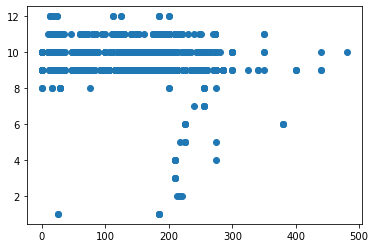

Text(0, 0.5, 'Pumpkin Price')

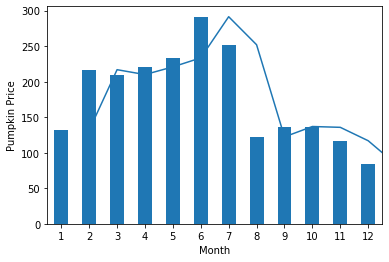

In [8]:
import matplotlib.pyplot as plt
price = new_pumpkins.Price
month = new_pumpkins.Month
plt.scatter(price, month)
plt.show()

new_pumpkins.groupby(['Month'])['Price'].mean().plot(kind='bar')
plt.ylabel("Pumpkin Price")

new_pumpkins.groupby(['Month'])['Price'].mean().plot(kind='line')
plt.ylabel("Pumpkin Price")

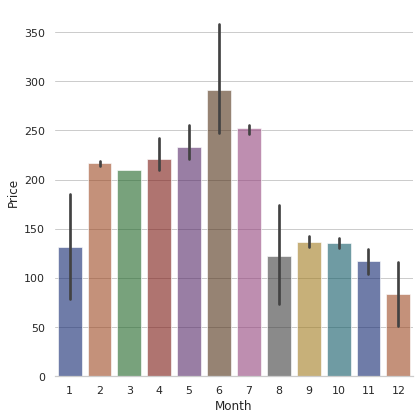

In [10]:
import seaborn as sns
sns.set_theme(style="whitegrid")

# Draw a nested barplot by species and sex
g = sns.catplot(
    data=new_pumpkins, kind="bar",
    x="Month", y="Price",
    palette="dark", alpha=.6, height=6
)
g.despine(left=True)
g.set_axis_labels("Month", "Price")